In [1]:
# Data set generation
import numpy as np
import matplotlib.pyplot as plt
import random

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam, Adadelta, Nadam
from sklearn.model_selection import train_test_split

# Generate 3 dimensional dataset with 10 classes and 250 elements
def generate_dataset():
    X = []
    y = []
    means = [[3, 3, 3], [5, 5, 5], [7, 7, 7], [9, 9, 9], [1, 1, 1], [2, 2, 2], [4, 4, 4], [6, 6, 6], [8, 8, 8], [0, 0, 0]]
    covs = [[[1, 0, 0], [0, 1, 0], [0, 0, 1]], [[1, 0, 0], [0, 1, 0], [0, 0, 1]], [[1, 0, 0], [0, 1, 0], [0, 0, 1]],
            [[1, 0, 0], [0, 1, 0], [0, 0, 1]], [[1, 0, 0], [0, 1, 0], [0, 0, 1]], [[1, 0, 0], [0, 1, 0], [0, 0, 1]],
            [[1, 0, 0], [0, 1, 0], [0, 0, 1]], [[1, 0, 0], [0, 1, 0], [0, 0, 1]], [[1, 0, 0], [0, 1, 0], [0, 0, 1]],
            [[1, 0, 0], [0, 1, 0], [0, 0, 1]]]
    for i in range(10):
        X_class = np.random.multivariate_normal(means[i], covs[i], 25)
        X.extend(X_class)
        y.extend([i] * 25)
    return np.array(X), np.array(y)


In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
def plot_dataset(X, y):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    for i in range(10):
        X_class = X[y == i]
        ax.scatter(X_class[:, 0], X_class[:, 1], X_class[:, 2], label='Class {}'.format(i))
    ax.legend()
    ax.set_title('3D Visualization of Synthetic Dataset')
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_zlabel('Z-axis')
    plt.show()


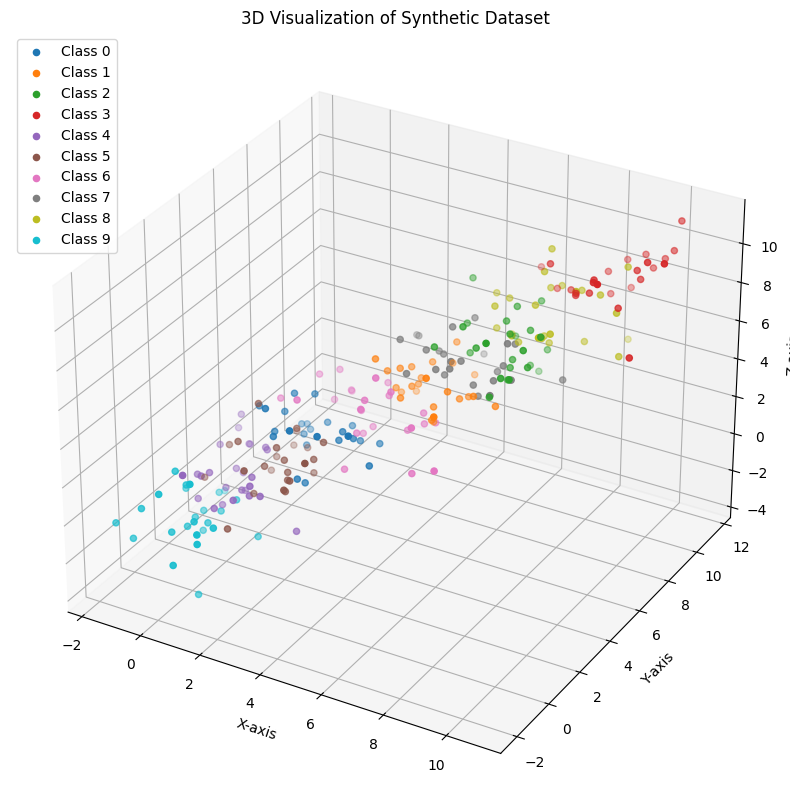

In [3]:
(x, y) = generate_dataset()
plot_dataset(x, y)

In [4]:
class Classifier:
    def __init__(self, num_layers, neurons_per_layer, activation):
        self.num_layers = num_layers
        self.neurons_per_layer = neurons_per_layer
        self.activation = activation

    def build_model(self, input_shape):
        model = Sequential()
        model.add(Dense(self.neurons_per_layer, activation=self.activation, input_shape=(input_shape,)))
        for i in range(self.num_layers - 1):
            model.add(Dense(self.neurons_per_layer, activation=self.activation))
        model.add(Dense(10, activation='softmax'))
        return model

In [5]:
def train(X, y, model, optimizer, epochs):
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    history = model.fit(X, y, epochs=epochs, verbose=0)
    return history

In [6]:
# Plot the training results
def plot_history(history):
    plt.plot(history.history['accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.show()

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
def plot_classification_results(X, y, model, num_layers, neurons_per_layer):
    y_probs = model.predict(X)
    y_pred = np.argmax(y_probs, axis=1)
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    for i in range(5):
        X_class = X[y == i]
        y_pred_class = y_pred[y == i]
        X_class_3d = np.column_stack((X_class, np.zeros(len(X_class)))) # add a third dimension
        ax.scatter(X_class_3d[:, 0], X_class_3d[:, 1], X_class_3d[:, 2], c=y_pred_class,
                   label='Class {}'.format(i))
    ax.legend()
    ax.set_title(f'Classification Results\n({num_layers} Layers, {neurons_per_layer} Neurons per Layer)')  # Dodanie opisu
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_zlabel('Z-axis')
    plt.show()

Running experiment for configuration: 2 layers, 16 neurons per layer, activation: relu
2/2 [==============================] - 0s 8ms/step - loss: 1.4420 - accuracy: 0.3400
Test Accuracy: 0.3400000035762787


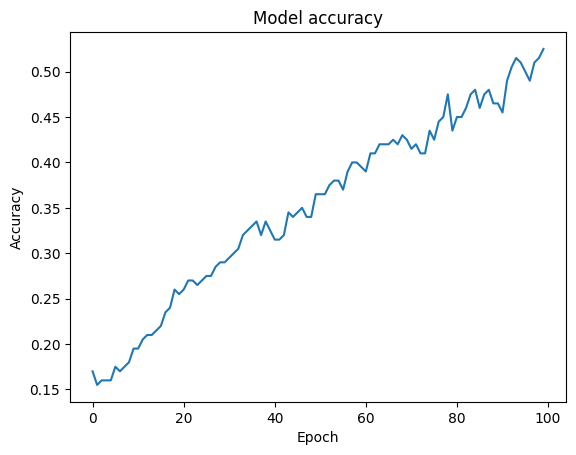


Running experiment for configuration: 3 layers, 32 neurons per layer, activation: tanh
2/2 [==============================] - 0s 8ms/step - loss: 1.0726 - accuracy: 0.5000
Test Accuracy: 0.5


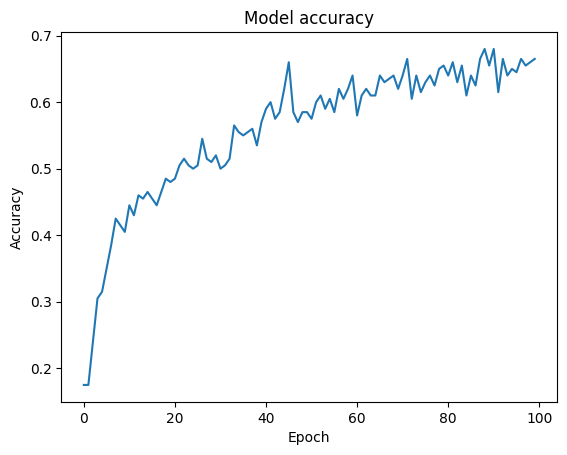


Running experiment for configuration: 4 layers, 64 neurons per layer, activation: sigmoid
2/2 [==============================] - 0s 10ms/step - loss: 1.2920 - accuracy: 0.3000
Test Accuracy: 0.30000001192092896


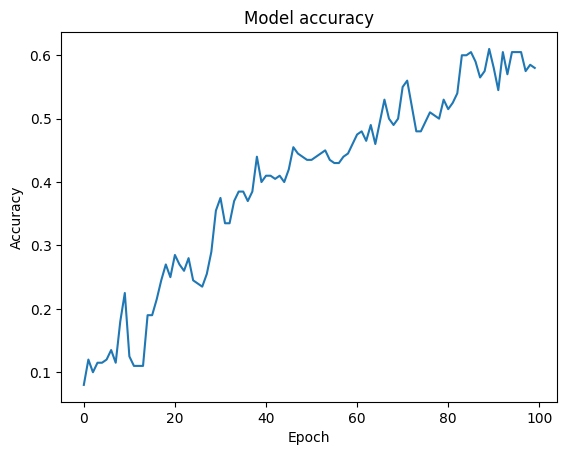


Running experiment for configuration: 2 layers, 32 neurons per layer, activation: elu
2/2 [==============================] - 0s 9ms/step - loss: 1.2060 - accuracy: 0.3800
Test Accuracy: 0.3799999952316284


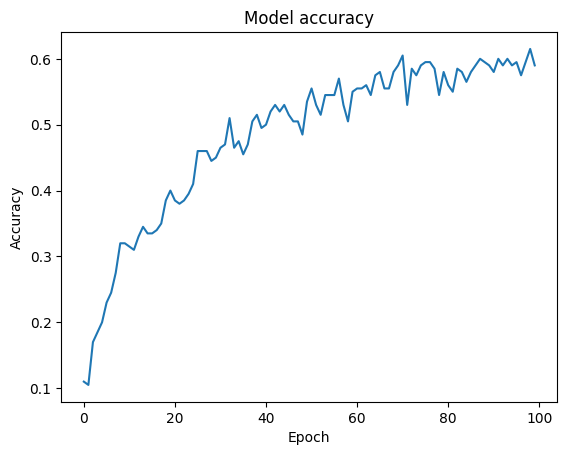


Running experiment for configuration: 3 layers, 64 neurons per layer, activation: relu


2/2 [==============================] - 0s 7ms/step - loss: 0.9063 - accuracy: 0.6000
Test Accuracy: 0.6000000238418579


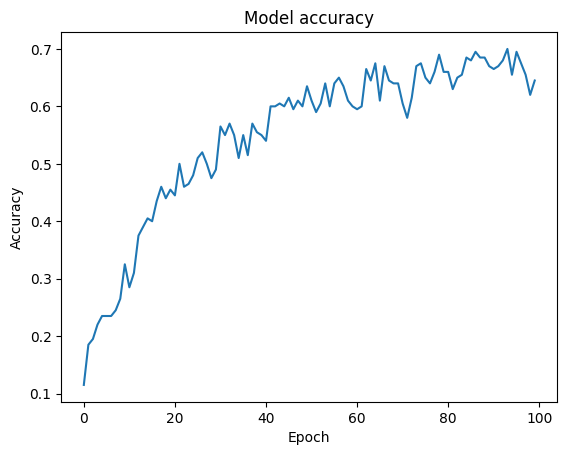

In [8]:
def experiment(num_layers=3, neurons_per_layer=32, activation='relu', epochs=100):
    X, y = generate_dataset()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    classifier = Classifier(num_layers, neurons_per_layer, activation)
    model = classifier.build_model(input_shape=3)

    optimizer = Adam(learning_rate=0.001)
    history = train(X_train, y_train, model, optimizer, epochs)

    # Ewaluacja modelu na zbiorze testowym
    test_loss, test_accuracy = model.evaluate(X_test, y_test)
    print(f"Test Accuracy: {test_accuracy}")

    # Wykres dokładności treningu
    plt.plot(history.history['accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.show()
# Wywołanie eksperymentu dla różnych konfiguracji
configurations = [
    (2, 16, 'relu'),
    (3, 32, 'tanh'),
    (4, 64, 'sigmoid'),
    (2, 32, 'elu'),
    (3, 64, 'relu')
]

for config in configurations:
    num_layers, neurons_per_layer, activation = config
    print(f"Running experiment for configuration: {num_layers} layers, {neurons_per_layer} neurons per layer, activation: {activation}")
    experiment(num_layers=num_layers, neurons_per_layer=neurons_per_layer, activation=activation)
    print()